#  Credit Card Customer Segmentation Project


In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('credit_scoring.csv')

In [45]:
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [46]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')

Age: This feature represents the age of the individual.

Gender: This feature captures the gender of the individual.

Marital Status: This feature denotes the marital status of the individual.

Education Level: This feature represents the highest level of education attained by the individual.

Employment Status: This feature indicates the current employment status of the individual.

Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.

Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.

Number of Credit Accounts: It represents the count of active credit accounts the person holds.

Loan Amount: It indicates the monetary value of the loan.

Interest Rate: This feature represents the interest rate associated with the loan.

Loan Term: This feature denotes the duration or term of the loan.

Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [48]:
df.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


In [49]:
df.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

## Calculating the average loan amount and interest rate by employment status

In [50]:
grouped_Data = df.groupby('Employment Status')[['Loan Amount', 'Interest Rate']].mean()
grouped_Data

,Loan Amount,Interest Rate
Employment Status,,
Employed,2.427543e+06,10.835061
Self-Employed,2.447867e+06,10.521902
Unemployed,2.540791e+06,10.712615


## Aggregating multiple statistics by Type of Loan



In [51]:
loan_status = df.groupby('Type of Loan').agg({'Loan Amount':['mean','median','max'],'Interest Rate':['mean','median','max'], 'Credit Utilization Ratio':['mean','std']})
loan_status

Loan Amount                     Interest Rate                 \
                       mean     median      max          mean  median    max   
Type of Loan                                                                   
Auto Loan      2.478124e+06  2386500.0  4970000     10.870431  11.035  19.98   
Home Loan      2.510689e+06  2473500.0  4996000     10.825549  10.645  19.99   
Personal Loan  2.424407e+06  2455000.0  4988000     10.348488  10.310  19.86   

              Credit Utilization Ratio            
                                  mean       std  
Type of Loan                                      
Auto Loan                     0.515431  0.292175  
Home Loan                     0.515396  0.287370  
Personal Loan                 0.498549  0.294116

## Filtering rows with high-interest rates and specific loan types

In [52]:
filtered_df = df[(df['Interest Rate'] >10) & (df['Type of Loan']== 'Personal Loan')]
filtered_df

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
5,42,Male,Divorced,Master,Unemployed,0.94,2342.0,2,1536000,11.15,24,Personal Loan
8,54,Female,Divorced,PhD,Unemployed,0.40,800.0,3,4374000,10.38,12,Personal Loan
9,60,Male,Divorced,PhD,Unemployed,0.06,1371.0,10,4026000,11.05,60,Personal Loan
14,54,Male,Divorced,Master,Self-Employed,1.00,2371.0,6,3775000,18.09,48,Personal Loan
19,31,Female,Single,Bachelor,Employed,0.44,2000.0,2,524000,13.39,60,Personal Loan
...,...,...,...,...,...,...,...,...,...,...,...,...
983,55,Male,Married,Master,Self-Employed,0.02,1285.0,9,475000,12.41,36,Personal Loan
987,52,Female,Married,PhD,Unemployed,0.03,2628.0,3,3297000,15.49,12,Personal Loan
992,25,Female,Single,Bachelor,Unemployed,0.49,2800.0,4,1609000,17.65,12,Personal Loan
993,46,Female,Divorced,PhD,Unemployed,0.10,114.0,7,301000,14.11,12,Personal Loan


# Univariate Analysis

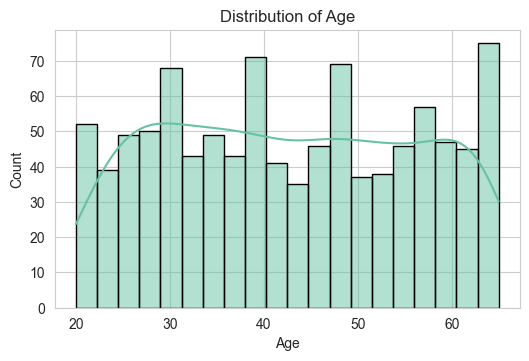

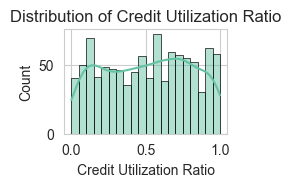

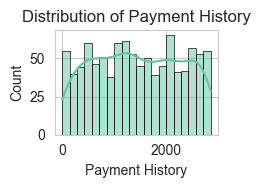

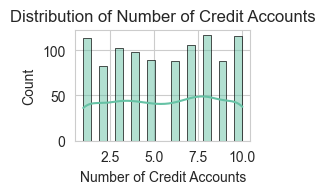

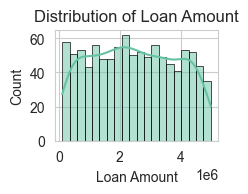

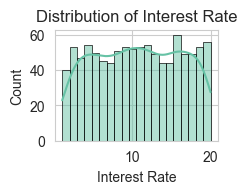

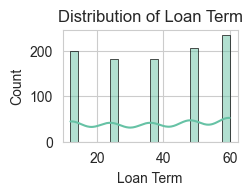

In [55]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

numeric_columns = ['Age','Credit Utilization Ratio','Payment History','Number of Credit Accounts','Loan Amount', 'Interest Rate','Loan Term']

plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True, bins=20,edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

C:\Users\himab\AppData\Local\Temp\ipykernel_16656\622027.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x=col,palette=palette)
C:\Users\himab\AppData\Local\Temp\ipykernel_16656\622027.py:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data = df,x=col,palette=palette)
C:\Users\himab\AppData\Local\Temp\ipykernel_16656\622027.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x=col,palette=palette)
C:\Users\himab\AppData\Local\Temp\ipykernel_16656\622027.py:7: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data = df,x=col,palette=palette

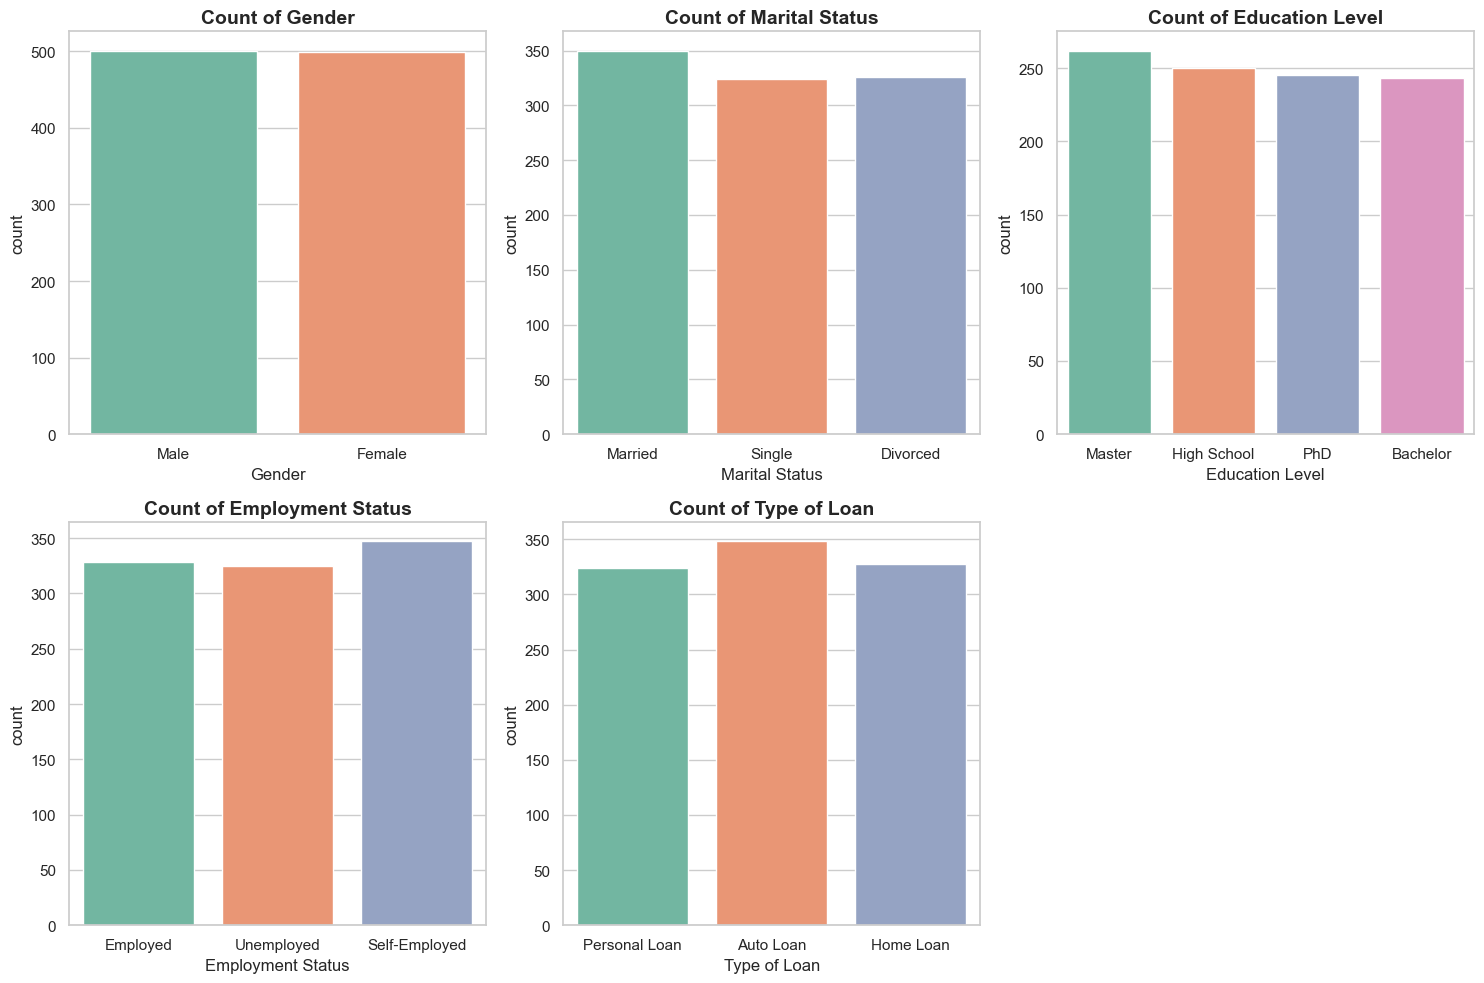

In [56]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")
categorical_columns = ['Gender','Marital Status','Education Level','Employment Status','Type of Loan']
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_columns,1):
    plt.subplot(2,3,i)
    sns.countplot(data = df,x=col,palette=palette)
    plt.title(f'Count of {col}', fontsize=14,fontweight='bold')
    
plt.tight_layout()
plt.show()

# Bivariate Analysis

C:\Users\himab\AppData\Local\Temp\ipykernel_16656\2821981751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level', y='Loan Amount', data=df,palette= "Set2")


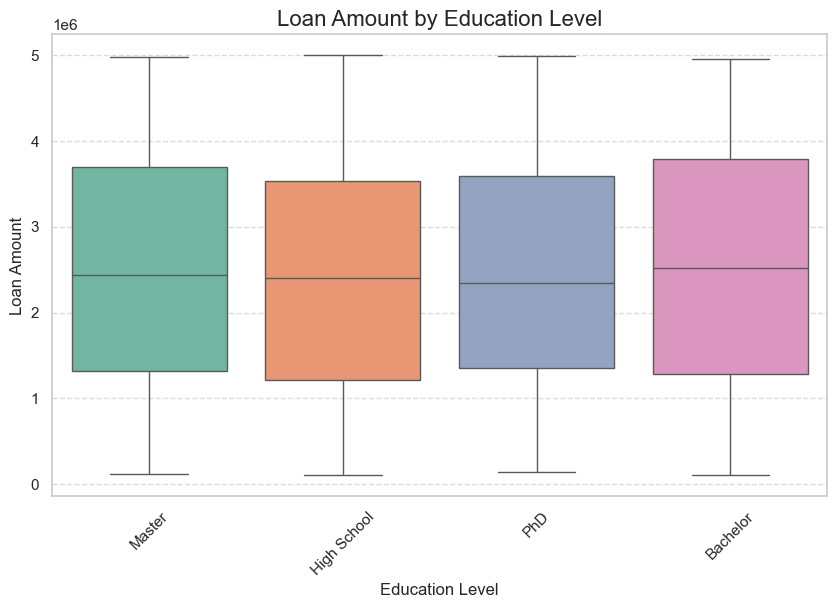

In [57]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Education Level', y='Loan Amount', data=df,palette= "Set2")
plt.title('Loan Amount by Education Level', fontsize =16)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.xticks(rotation=45)
plt.show()

C:\Users\himab\AppData\Local\Temp\ipykernel_16656\4271415791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Employment Status', y='Interest Rate',palette='Set2')


([0, 1, 2],
 [Text(0, 0, 'Employed'),
  Text(1, 0, 'Unemployed'),
  Text(2, 0, 'Self-Employed')])

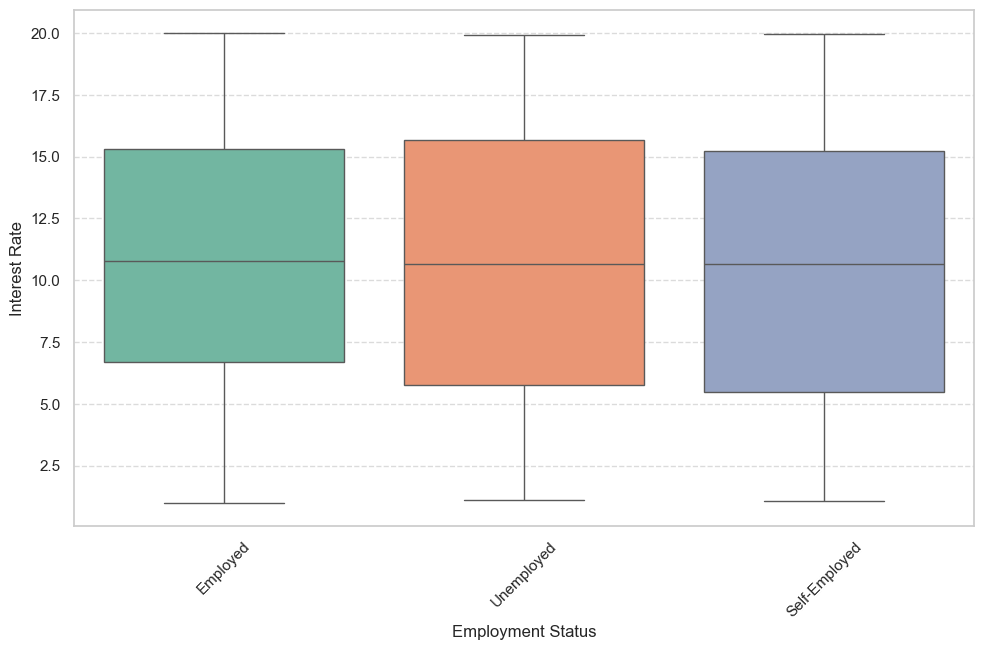

In [61]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x='Employment Status', y='Interest Rate',palette='Set2')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)

C:\Users\himab\AppData\Local\Temp\ipykernel_16656\724853724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of Loan',y='Loan Term',data = df,palette='Set2')


([0, 1, 2],
 [Text(0, 0, 'Personal Loan'),
  Text(1, 0, 'Auto Loan'),
  Text(2, 0, 'Home Loan')])

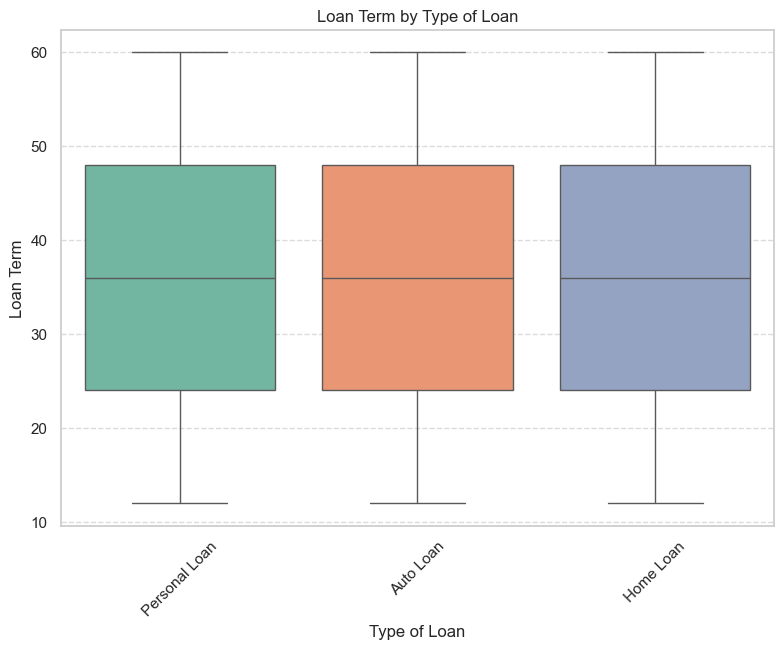

In [62]:
plt.figure(figsize=(8,6))

sns.boxplot(x='Type of Loan',y='Loan Term',data = df,palette='Set2')
plt.title("Loan Term by Type of Loan")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)

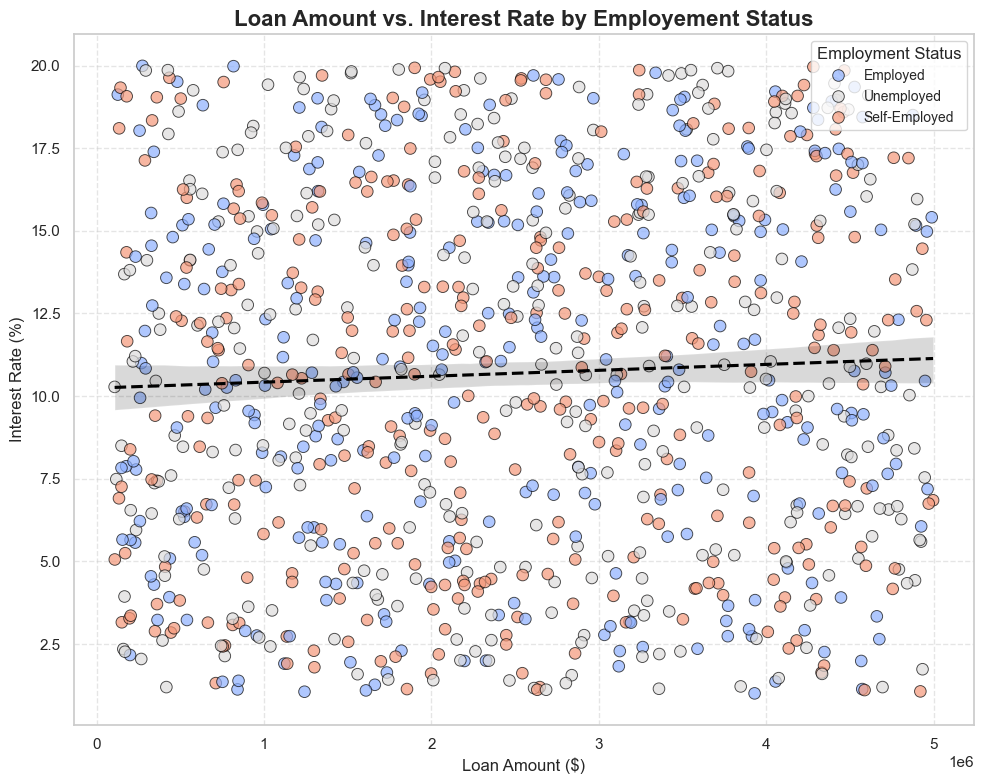

In [65]:
plt.figure(figsize=(10,8))

sns.scatterplot(x='Loan Amount', y='Interest Rate', data=df, hue='Employment Status', palette='coolwarm', edgecolor='black',s=70,alpha=0.7)

sns.regplot(x='Loan Amount', y='Interest Rate', data=df, scatter=False,color='gray',line_kws={'linestyle':'--', 'color':'black'})

plt.title("Loan Amount vs. Interest Rate by Employement Status", fontsize =16, fontweight='bold')

plt.xlabel("Loan Amount ($)", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)

plt.legend(title='Employment Status', title_fontsize='12', fontsize='10', loc='upper right')

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

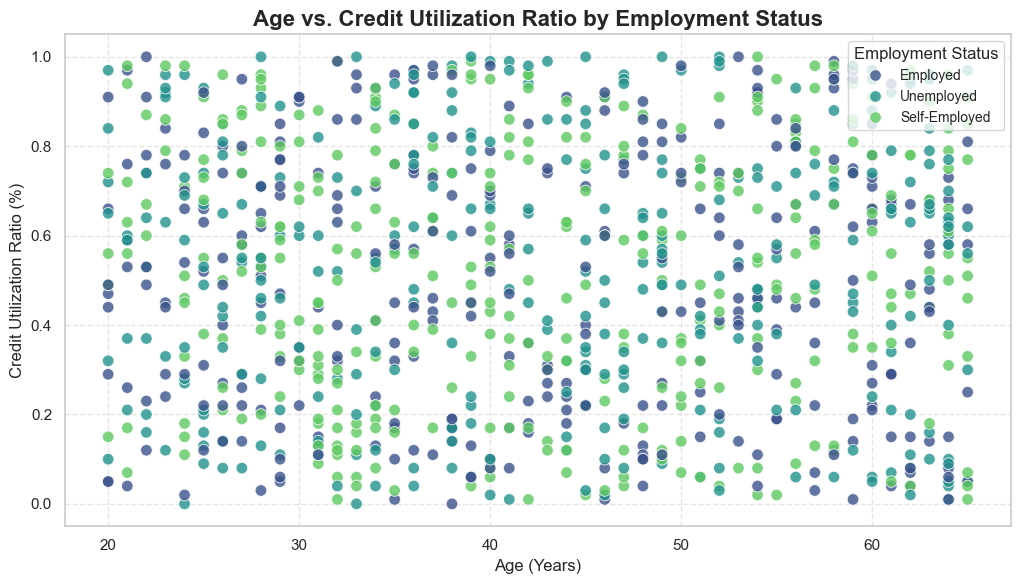

In [66]:
plt.figure(figsize=(20,6))  # Larger figure size to accommodate the subplot


plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Age', y='Credit Utilization Ratio', hue='Employment Status', palette='viridis', s=70, edgecolor='w', alpha=0.8)


plt.title("Age vs. Credit Utilization Ratio by Employment Status", fontsize=16, fontweight='bold')


plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Credit Utilization Ratio (%)", fontsize=12)

plt.legend(title='Employment Status', title_fontsize=12, fontsize=10, loc='upper right')


plt.grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

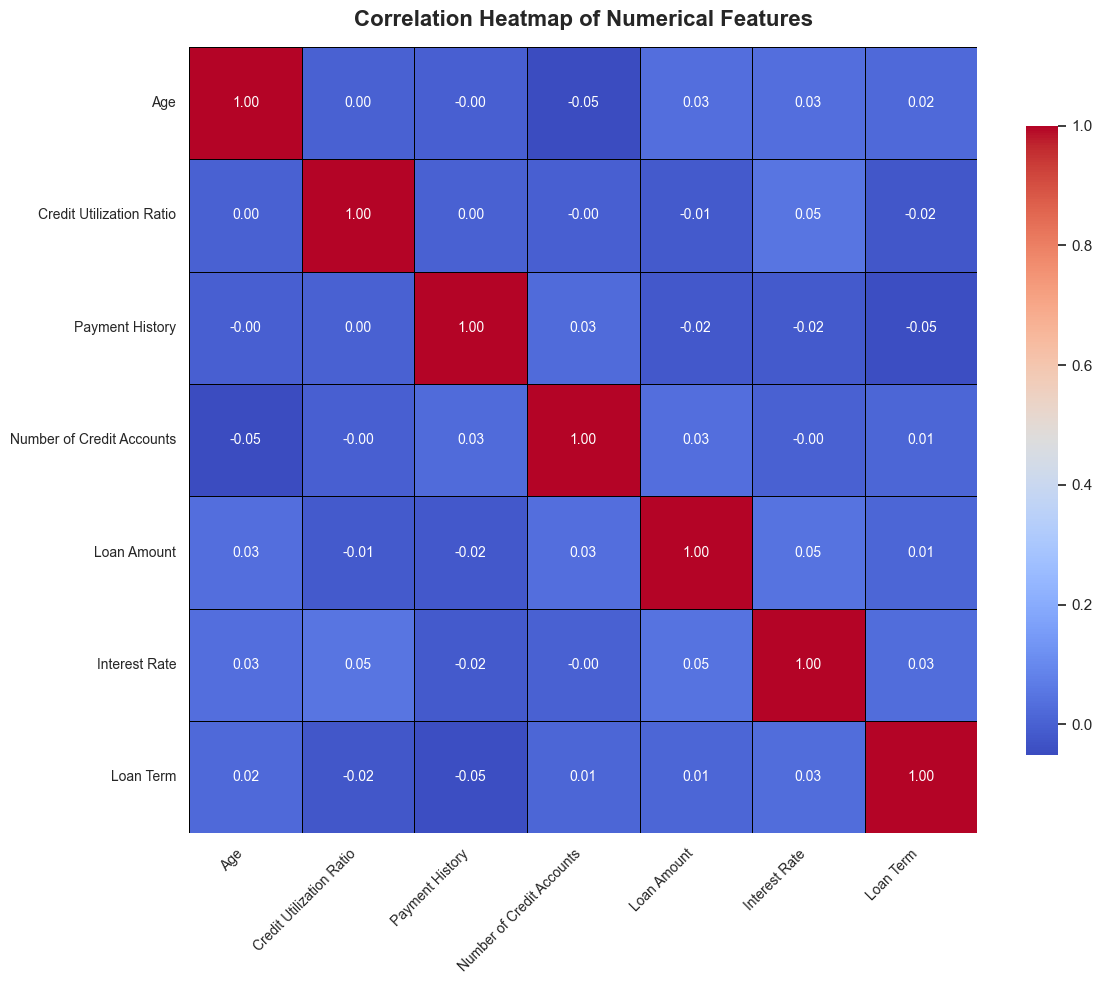

In [69]:
plt.figure(figsize=(12,10))

sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, linecolor='black', annot_kws={"size": 10}, 
            cbar_kws={"shrink": 0.8, "aspect": 20})

plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight='bold', pad=15)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

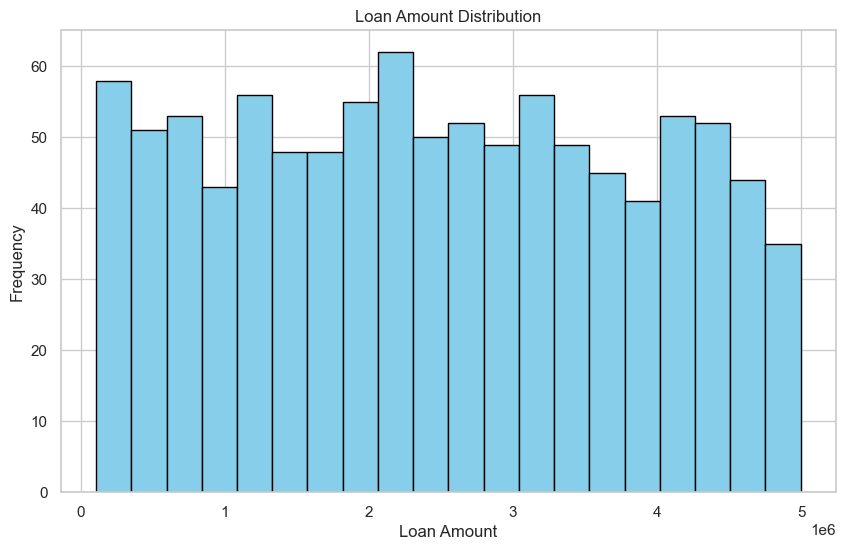

In [70]:

plt.figure(figsize=(10, 6))
plt.hist(df['Loan Amount'],bins = 20, color = 'skyblue',edgecolor='black')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [71]:
print(df[['Payment History', 'Credit Utilization Ratio', 'Number of Credit Accounts', 'Education Level', 'Employment Status']].isnull().sum())

Payment History              0
Credit Utilization Ratio     0
Number of Credit Accounts    0
Education Level              0
Employment Status            0
dtype: int64


# Credit Scoring & Segmentation
To calculate the credit scores, we need to use an appropriate technique. There are several widely used techniques for calculating credit scores, each with its own calculation process. One example is the FICO score, a commonly used credit scoring model in the industry.

In [72]:
df['Payment History'] = pd.to_numeric(df['Payment History'], errors='coerce')
df['Credit Utilization Ratio'] = pd.to_numeric(df['Credit Utilization Ratio'], errors='coerce')
df['Number of Credit Accounts'] = pd.to_numeric(df['Number of Credit Accounts'], errors='coerce')
df['Education Level'] = pd.to_numeric(df['Education Level'], errors='coerce')
df['Employment Status'] = pd.to_numeric(df['Employment Status'], errors='coerce')

In [73]:
# Check for missing values
print(df[['Payment History', 'Credit Utilization Ratio', 'Number of Credit Accounts', 'Education Level', 'Employment Status']].isnull().sum())

# Fill missing values with zeros or defaults
df.fillna({
    'Payment History': 0,
    'Credit Utilization Ratio': 0,
    'Number of Credit Accounts': 0,
    'Education Level': 1,  
    'Employment Status': 0 
}, inplace=True)


df['Credit Score'] = (
    (df['Payment History'] * 0.35) +
    (df['Credit Utilization Ratio'] * 0.30) +
    (df['Number of Credit Accounts'] * 0.15) +
    (df['Education Level'] * 0.10) +
    (df['Employment Status'] * 0.10)
)


print(df['Credit Score'])

Payment History                 0
Credit Utilization Ratio        0
Number of Credit Accounts       0
Education Level              1000
Employment Status            1000
dtype: int64
0      940.216
1      831.360
2      970.916
3      480.286
4      290.497
        ...   
995    451.272
996    650.581
997    921.454
998    400.346
999    360.701
Name: Credit Score, Length: 1000, dtype: float64


35% weight for “Payment History”,

30% weight for “Credit Utilization Ratio”,

15% weight for “Number of Credit Accounts”,

10% weight for “Education Level”,

and 10% weight for “Employment Status”.

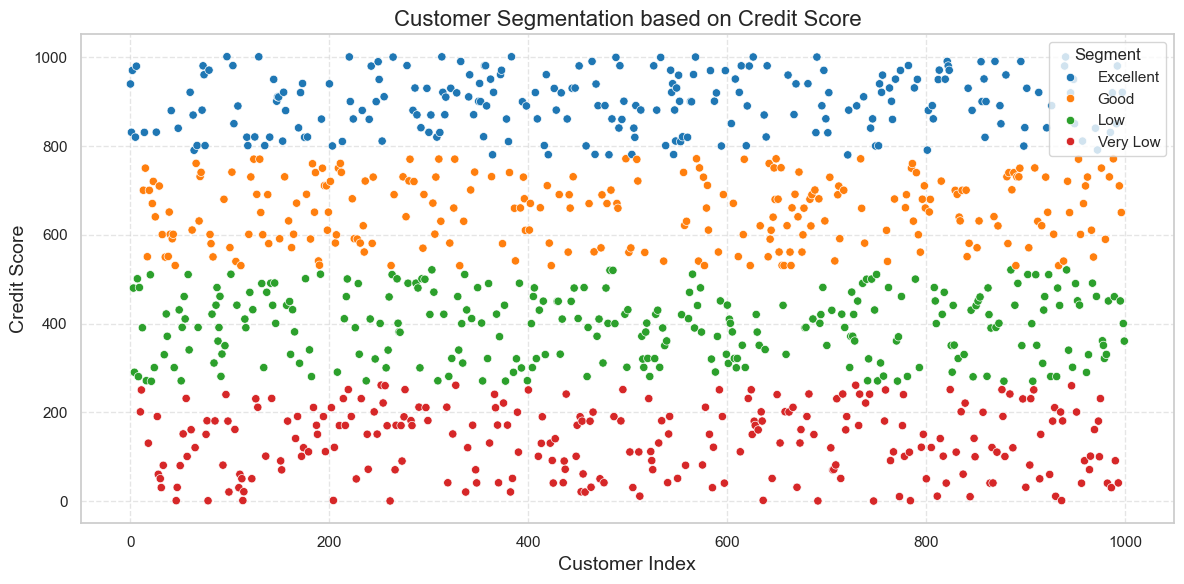

In [76]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['Credit Score']]
kmeans = KMeans(n_clusters = 4, n_init = 10 , random_state = 42)
df['Segment'] = kmeans.fit_predict(X)

df['Segment'] = df['Segment'].map({0:'Low', 1:'Good',2:'Very Low',3:'Excellent'})

df['Segment'] = df['Segment'].astype('category')

plt.figure(figsize=(12, 6))
sns.scatterplot(x= df.index, y='Credit Score', hue='Segment',data= df,palette = 'tab10')
plt.title('Customer Segmentation based on Credit Score', fontsize=16)
plt.xlabel('Customer Index', fontsize=14)
plt.ylabel('Credit Score', fontsize=14)
plt.legend(title='Segment')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Credit scoring and segmentation refer to the process of evaluating the creditworthiness of individuals or businesses and dividing them into distinct groups based on their credit profiles. It aims to assess the likelihood of borrowers repaying their debts and helps financial institutions make informed decisions regarding lending and managing credit risk.